In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import pickle
import streamlit as st
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [167]:
df = pd.read_csv('Housing.csv')

In [168]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Information

In [169]:
df.shape

(545, 13)

In [170]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### It looks like there no null values in over dataset

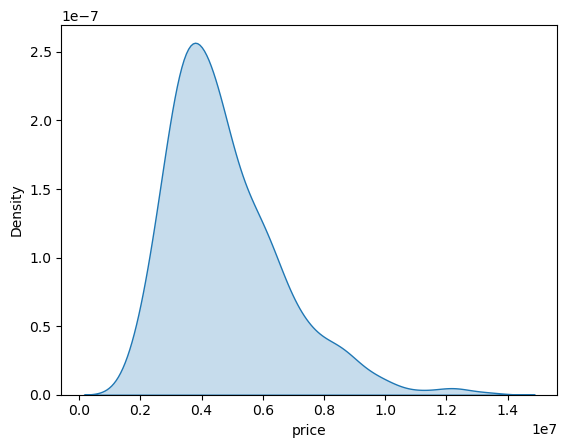

In [171]:
sns.kdeplot(df['price'],fill=True)
mean = df['price'].mean()
plt.show()

# Outliers 

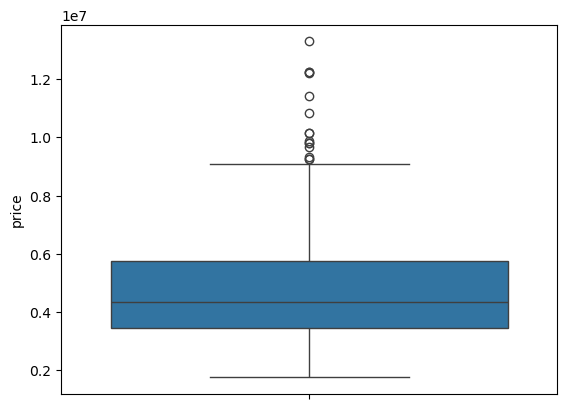

In [172]:
sns.boxplot(df['price'])
plt.show()

In [173]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
IQR

np.float64(2310000.0)

In [174]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [175]:
outliers = df[(df['price']<lower_limit)|(df['price']>upper_limit)]
outliers.shape

(15, 13)

# Removing outliers 

In [176]:
df_clean = df[(df['price']>=lower_limit) & (df['price']<=upper_limit)]

In [177]:
df_clean.shape

(530, 13)

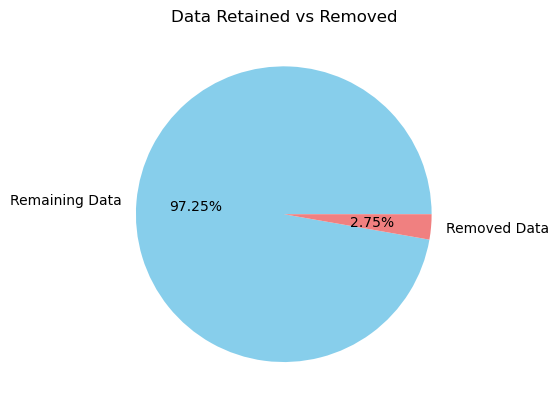

In [178]:
# Calculate counts
removed = len(df) - len(df_clean)
remaining = len(df_clean)

# Pie chart
plt.pie(
    [remaining, removed],
    labels=["Remaining Data", "Removed Data"],
    autopct="%.2f%%",
    colors=["skyblue", "lightcoral"]
)
plt.title("Data Retained vs Removed")
plt.show()


In [179]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [180]:
cat_col = df.select_dtypes(include='object').columns.tolist()

In [181]:
binary_col = [col for col in cat_col if df[col].nunique()==2]

In [182]:
binary_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

# Encoding 

In [183]:
le = LabelEncoder()
for col in binary_col:
    df[col] = le.fit_transform(df[col])

In [184]:
mult_col = [col for col in cat_col if df[col].nunique()>2]
mult_col

['furnishingstatus']

In [185]:
df = pd.get_dummies(df,columns=mult_col,drop_first=True)

In [186]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


# Splitting data

In [187]:
X = df.drop(columns=['price'])
y = df['price']

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [189]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
370,4280,2,1,1,1,0,0,0,1,2,0,True,False
438,4500,2,1,1,0,0,0,0,0,0,0,True,False
528,3970,1,1,1,0,0,0,0,0,0,0,False,True
119,7020,3,1,1,1,0,1,0,1,2,1,True,False
7,16200,5,3,2,1,0,0,0,0,0,0,False,True


# Model Training

In [190]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Model predaction

In [191]:
y_pred = lr.predict(X_test)

In [192]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
r2 = r2_score(y_test,y_pred)

In [193]:
mse,rmse,r2

(1199438721041.6265, 1095188.8974243787, 0.6763981675471307)

# to improve R²

In [194]:
# Log transform
df['log_area'] = np.log1p(df['area'])
df['log_price'] = np.log1p(df['price'])

In [195]:
X = df.drop(columns=['price','log_price','area'])
y = df['log_price']

In [196]:
X.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,log_area
0,4,2,3,1,0,0,0,1,2,1,False,False,8.912069
1,4,4,4,1,0,0,0,1,3,0,False,False,9.100637
2,3,2,2,1,0,1,0,0,2,1,True,False,9.206433
3,4,2,2,1,0,1,0,1,3,1,False,False,8.922792
4,4,1,2,1,1,1,0,1,2,0,False,False,8.912069


In [197]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [198]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [199]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
r2 = r2_score(y_test,y_pred)
mse,rmse,r2

(0.04313282176260894, 0.20768442831037898, 0.7055472377987762)

In [202]:
# Save model
with open("lr_model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [ ]:
!streamlit run app.py